# 손실 함수
- 신경망 학습에서 최적의 매개변수 값을 탐색하는 데 사용하는 지표는 **손실 함수(loss function)** 이다. 일반적으로 
    - 오차제곱합(Sum of Squared Error, SSE)
    - 교차 엔트로피 오차(Cross Entropy Error, CEE)
    를 사용한다.
    

## 오차제곱합

<center>
    $E = \frac{1}{2}\Sigma_{k}^{}(y_k-t_k)^{2}$
</center>

$y_k$ : 신경망의 출력(신경망이 추정한 값)\
$t_k$ : 정답 레이블

In [13]:
# EX. 0 ~ 9까지의 예측 확률과 레이블

In [1]:
def sum_squares_error(y, t) :
    return 0.5*np.sum((y-t)**2)

In [2]:
# ex 1. 2일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

sum_squares_error(y, t)

0.09750000000000003

In [3]:
# ex 2. 7일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

sum_squares_error(y, t)

0.5975

ex.1은 정답이 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우이다
> SSE가 0.0975로 낮은 값

ex.2은 정답이 '2'이지만 신경망의 출력은 '7'에서 가장 높은 경우이다
> SSE가 0.5975로 높은 값

## 교차 엔트로피 오차

<center>
    $E = -\Sigma_{k}t_k\text{log}y_k$
</center>

$y_k$ : 신경망의 출력(신경망이 추정한 값)\
$t_k$ : 정답 레이블

In [4]:
def cross_entropy_error(y, t) :
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
# ex 1. 2일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

cross_entropy_error(y, t)

0.510825457099338

In [6]:
# ex 2. 7일 확률이 0.6으로 가장 높다고 예측

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

cross_entropy_error(y, t)

2.302584092994546

## 미니배치 학습

기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾는 것이다. 즉, 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다.

이때까지는 데이터 하나에 대한 손실 함수를 고려했지만 지금부터는 N개의 훈련 데이터에 대한 손실 함수를 탐색

**CCE**
<center>
    $E = -\frac{1}{N}\Sigma_{n}\Sigma_{k}t_{nk}\text{log}y_{nk}$
</center>

N개의 데이터의 손실 함수의 산술평균

현실적으로 데이터의 수가 많은 경우 모든 데이터를 대상으로 손실 함수의 값을 구하는 데는 많은 시간이 걸린다.
> 데이터 일부를 추려 전체의 **근사치**로 이용

신경망에서도 일부만 골라 학습을 수행하는데 이를 **미니배치**라고 한다.



In [9]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist 

(X_train, t_train), (X_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

print(X_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


**무작위로 10장 추출**

In [10]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

## 배치용 교차 엔트로피 오차 구현 

In [15]:
def cross_entropy_error(y, t) : 
    if y.ndim == 1 : 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어진 경우 : 

In [16]:
def cross_entropy_error(y, t) : 
    if y.ndim == 1 : 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

# 수치 미분 

In [31]:
def numerical_diff(f, x) : 
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [28]:
# ex. y = 0.01x^2 + 0.1x
def function_1(x) :
    return 0.01*x**2 + 0.1*x

In [29]:
import numpy as np 
import matplotlib.pylab as plt 

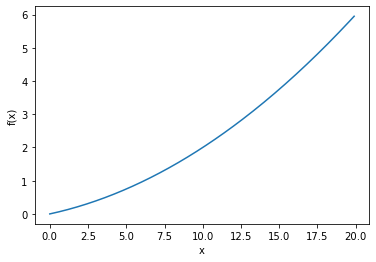

In [30]:
x = np.arange(0, 20, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [33]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


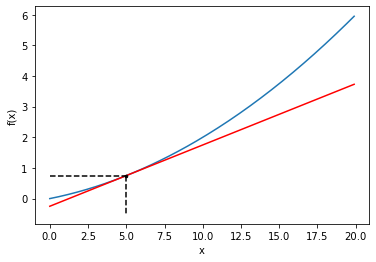

In [51]:
def tangent_line1(x) : 
    return numerical_diff(function_1, 5) * (x-5) + function_1(5)

x = np.arange(0, 20, 0.1)
y = function_1(x)

 
x_ = np.arange(0, 20, 0.1)
y_ = tangent_line1(x_)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x_, y_, color = 'red')
plt.plot(5, function_1(5), markersize = 5, marker = '.', color = 'black')
plt.plot([0,5], [function_1(5), function_1(5)], 'k--')
plt.plot([5,5], [function_1(5), -0.5], 'k--')
plt.show()

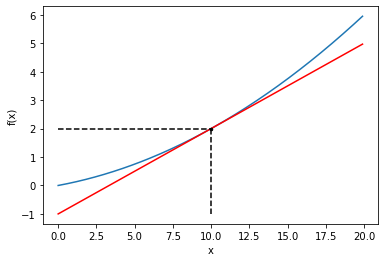

In [54]:
def tangent_line2(x) : 
    return numerical_diff(function_1, 10) * (x-10) + function_1(10)

x = np.arange(0, 20, 0.1)
y = function_1(x)

 
x_ = np.arange(0, 20, 0.1)
y_ = tangent_line2(x_)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x_, y_, color = 'red')
plt.plot(10, function_1(10), markersize = 5, marker = '.', color = 'black')
plt.plot([0,10], [function_1(10), function_1(10)], 'k--')
plt.plot([10,10], [function_1(10), -1], 'k--')
plt.show()

## 편미분 

$f(x_0, x_1)=x_0^2+x_1^2$

In [55]:
def function_2(x) : # 이 때는 x가 벡터
    return x[0] ** 2 + x[1] ** 2 
    # return np.sum(x ** 2)도 가능
    

$x_0$ = 3, $x_1$ = 4일 때 $x_0$에 대한 편미분 $\frac{\partial{f}}{\partial{x_0}}$ 구하기

In [56]:
def function_tmp1(x0) : 
    return x0*x0 + 4.0**2.0

In [57]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378